<a href="https://colab.research.google.com/github/edwinaloo/solaraccess/blob/master/multiple_linear_regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
df=pd.read_csv("/content/50_Startups.csv")

In [5]:
df=pd.DataFrame(df)

In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


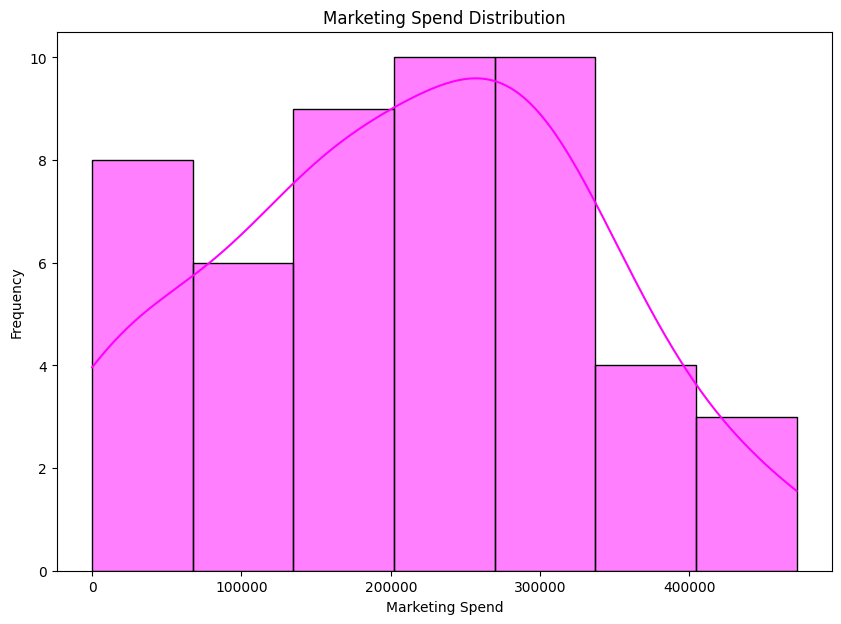

In [9]:
plt.figure(figsize=(10, 7))
sns.histplot(df['Marketing Spend'], kde=True, color='magenta')
plt.title('Marketing Spend Distribution')
plt.xlabel('Marketing Spend')
plt.ylabel('Frequency')
plt.show()

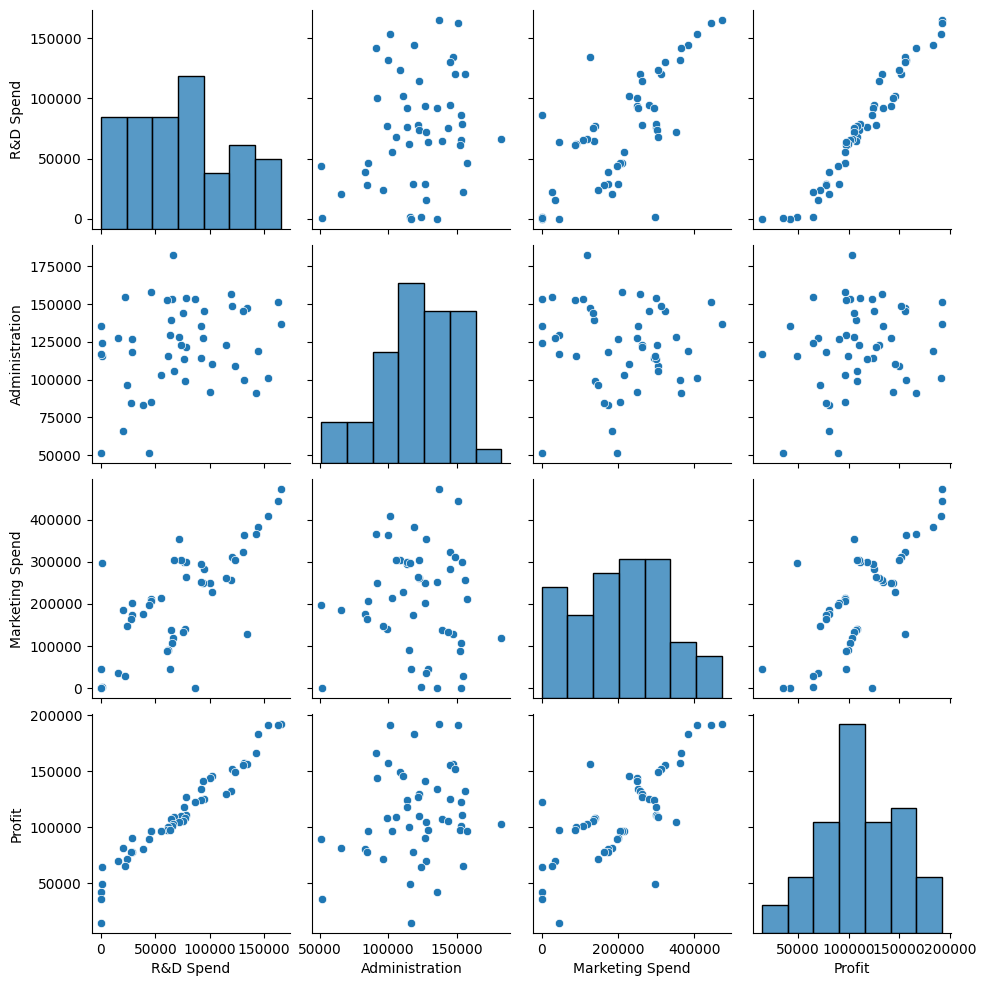

In [10]:
sns.pairplot(df)
plt.show()

In [13]:
X = df.drop('Administration', axis=1)
y = df['Administration']

In [14]:

X_encoded = pd.get_dummies(X, columns=['State'], drop_first=True)


In [15]:
X_encoded.head()



,R&D Spend,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,471784.10,192261.83,False,True
1,162597.70,443898.53,191792.06,False,False
2,153441.51,407934.54,191050.39,True,False
3,144372.41,383199.62,182901.99,False,True
4,142107.34,366168.42,166187.94,True,False


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y,
test_size=0.2, random_state=32)

In [17]:
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (40, 5)
Test set shape: (10, 5)


In [18]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pred=regressor.predict(X_test)

In [20]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),
y_test.values.reshape(len(y_test),1)),1))

[[106349.68 116983.8 ]
 [115831.26 121597.55]
 [115181.57  84710.77]
 [110840.34  85047.44]
 [115986.76 154806.14]
 [125800.65 148718.95]
 [124265.38 152701.92]
 [129691.7  127320.38]
 [132022.62 144135.98]
 [136144.67 101145.55]]
